In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
root = 'D:/workspace/SpamPage/img'
normal_path = os.path.join(root,'normal')
spam_path = os.path.join(root,'spam')

In [3]:
normal_img_path = glob.glob(os.path.join(normal_path,'*.jpg'))
spam_img_path = glob.glob(os.path.join(spam_path,'*.jpg'))

In [4]:
import tensorflow as tf

In [5]:
normal_imgs = [tf.keras.preprocessing.image.load_img(img_path,target_size=(500,300)) for img_path in normal_img_path]

In [6]:
spam_imgs = [tf.keras.preprocessing.image.load_img(img_path,target_size=(500,300)) for img_path in spam_img_path]

In [7]:
type(normal_imgs[0])

PIL.Image.Image

In [8]:
normal_imgs = [tf.keras.preprocessing.image.img_to_array(img) for img in normal_imgs]
spam_imgs = [tf.keras.preprocessing.image.img_to_array(img) for img in spam_imgs]

In [9]:
normal_imgs = np.array(normal_imgs)
spam_imgs = np.array(spam_imgs)

In [10]:
normal_imgs.shape

(16, 500, 300, 3)

In [11]:
spam_imgs.shape

(16, 500, 300, 3)

In [12]:
normal_labels = np.ones((normal_imgs.shape[0],1))
spam_labels = np.zeros((spam_imgs.shape[0],1))

In [13]:
X = np.concatenate([normal_imgs,spam_imgs],axis=0)
y = np.concatenate([normal_labels,spam_labels],axis=0)

In [14]:
X.shape

(32, 500, 300, 3)

In [15]:
y.shape

(32, 1)

In [16]:
# shuffle the dataset
permute = np.random.permutation(X.shape[0])
X = X[permute,:]
y = y[permute,:]

In [17]:
train_rate = 0.60
train_size = int(X.shape[0]*train_rate)
X_train = X[:train_size,:,:,:]
y_train = y[:train_size,:]
X_test = X[train_size:,:,:,:]
y_test = y[train_size:,:]

In [18]:
base_model = tf.keras.models.load_model('D:/data/models/vgg16.h5')

for layer in base_model.layers:
    layer.trainable = False

In [19]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [20]:
model = tf.keras.Model(inputs=base_model.inputs,outputs=x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [22]:
model.evaluate(X_test,y_test,batch_size=2)

13/13 [==============================] - 11s 862ms/step


[3.619017444837552, 0.46153846153846156]

In [23]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=2)

Epoch 1/10
19/19 [==============================] - 4s 217ms/step - loss: 4.1896 - acc: 0.3684
Epoch 2/10
19/19 [==============================] - 4s 194ms/step - loss: 1.0010 - acc: 0.8421
Epoch 3/10
19/19 [==============================] - 4s 195ms/step - loss: 0.5718 - acc: 0.9474
Epoch 4/10
19/19 [==============================] - 4s 196ms/step - loss: 0.0447 - acc: 0.9474
Epoch 5/10
19/19 [==============================] - 4s 197ms/step - loss: 4.6113e-04 - acc: 1.0000
Epoch 6/10
19/19 [==============================] - 4s 197ms/step - loss: 0.0015 - acc: 1.0000
Epoch 7/10
19/19 [==============================] - 4s 198ms/step - loss: 0.0018 - acc: 1.0000
Epoch 8/10
19/19 [==============================] - 4s 197ms/step - loss: 0.0010 - acc: 1.0000
Epoch 9/10
19/19 [==============================] - 4s 200ms/step - loss: 6.3793e-04 - acc: 1.0000
Epoch 10/10
19/19 [==============================] - 4s 199ms/step - loss: 4.7288e-04 - acc: 1.0000


In [24]:
model.evaluate(X_test,y_test,batch_size=2)

13/13 [==============================] - 3s 197ms/step


[2.8121768379619776, 0.6153846153846154]

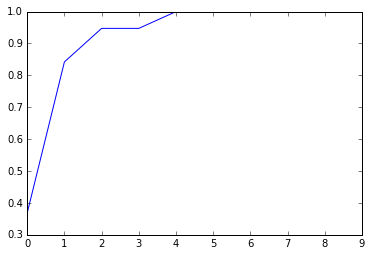

In [25]:
loss = hist.history['loss']
acc = hist.history['acc']

plt.plot(acc,'b-')

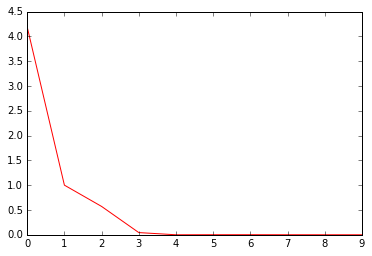

In [26]:
plt.plot(loss,'r-')

In [27]:
# the following is a different model trained before.

In [28]:
test = tf.keras.models.load_model('d:/data/SpamPage_vgg16.h5')

In [29]:
test.evaluate(X_test,y_test,batch_size=2)

13/13 [==============================] - 3s 207ms/step


[0.021214731562605057, 1.0]

In [39]:
test.predict(X_test[7].reshape(1,500,300,3))

array([[0.9999076]], dtype=float32)

In [41]:
y_test[7]

array([1.])

In [42]:
y_test

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])